In [54]:
import pandas as pd

dataset=pd.read_csv('EUR_USD Historical Data.csv').values
open_value=dataset[:,2]
print(open_value[:5])

open_value=open_value.reshape(-1,1) #convering into a column vector
print(open_value[:5])

print(open_value.shape)

[1.4171 1.4046 1.4081 1.4112 1.4129]
[[1.4171]
 [1.4046]
 [1.4081]
 [1.4112]
 [1.4129]]
(2610, 1)


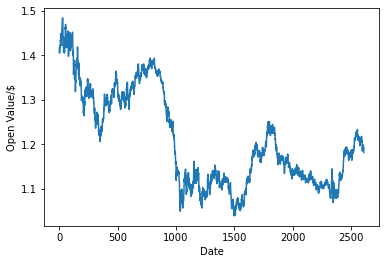

In [55]:
from matplotlib import pyplot as plt

plt.plot(open_value)
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_open_value=scaler.fit_transform(open_value)

print(open_value[:5])
print(scaled_open_value[:5])

[[1.4171]
 [1.4046]
 [1.4081]
 [1.4112]
 [1.4129]]
[[0.8518018 ]
 [0.82364865]
 [0.83153153]
 [0.83851351]
 [0.84234234]]


In [57]:
data=[]
target=[]
window_size=100
for i in range(window_size,open_value.shape[0]):
    data.append(scaled_open_value[i-window_size:i])
    target.append(scaled_open_value[i])

In [58]:
import numpy as np

data_np=np.array(data)
target_np=np.array(target)

print(data_np.shape)
print(target_np.shape)

(2510, 100, 1)
(2510, 1)


In [59]:
np.save('data',data)
np.save('target',target)

In [60]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [61]:
train_data=data[:2000]
train_target=target[:2000]

test_data=data[2000:]
test_target=target[2000:]

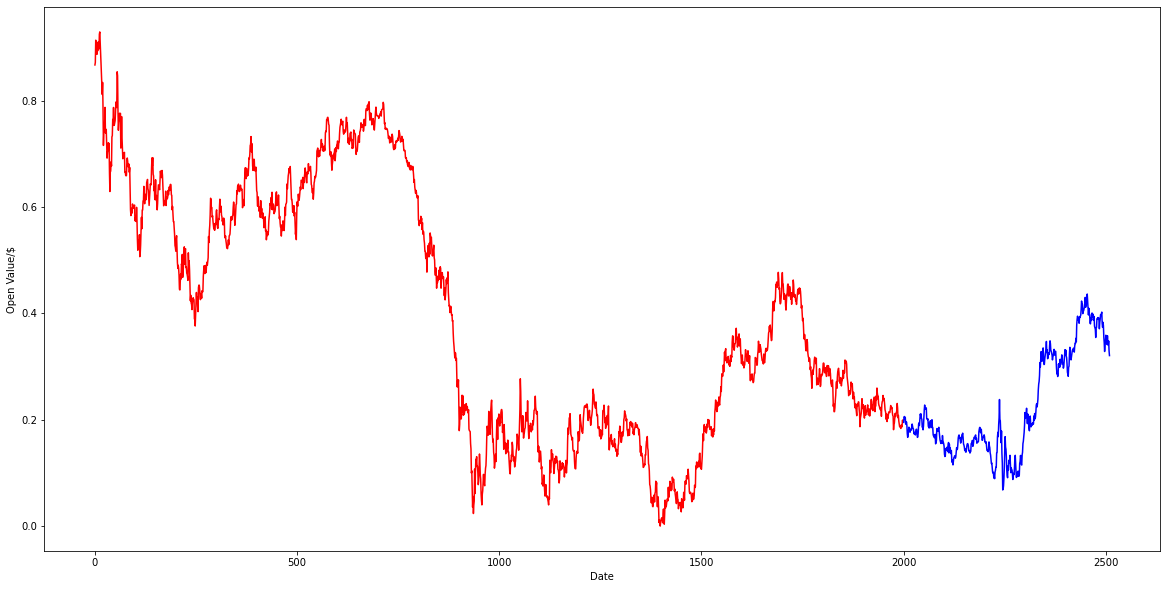

In [62]:
from matplotlib import pyplot as plt

test_x_range=np.arange(2000,2510,1)
#test_x_range is an array of values between 1000-1208
plt.figure(figsize=(20,10))
plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [63]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=196,return_sequences=True,input_shape=(data.shape[1:])))
model.add(Dropout(0.2))

model.add(LSTM(units=196,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=196,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=196,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',optimizer='adam')

In [64]:
history=model.fit(train_data,train_target,epochs=32,validation_split=0.1)

Epoch 1/32
57/57 [==============================] - 41s 573ms/step - loss: 0.0614 - val_loss: 4.7247e-04
Epoch 2/32
57/57 [==============================] - 30s 528ms/step - loss: 0.0029 - val_loss: 5.7803e-04
Epoch 3/32
57/57 [==============================] - 32s 556ms/step - loss: 0.0026 - val_loss: 4.0273e-04
Epoch 4/32
57/57 [==============================] - 38s 664ms/step - loss: 0.0031 - val_loss: 0.0013
Epoch 5/32
57/57 [==============================] - 40s 707ms/step - loss: 0.0025 - val_loss: 7.0067e-04
Epoch 6/32
57/57 [==============================] - 42s 732ms/step - loss: 0.0021 - val_loss: 5.0905e-04
Epoch 7/32
57/57 [==============================] - 42s 734ms/step - loss: 0.0021 - val_loss: 3.8532e-04
Epoch 8/32
57/57 [==============================] - 42s 731ms/step - loss: 0.0019 - val_loss: 3.8122e-04
Epoch 9/32
57/57 [==============================] - 42s 731ms/step - loss: 0.0018 - val_loss: 4.4569e-04
Epoch 10/32
57/57 [==============================] - 42s 73

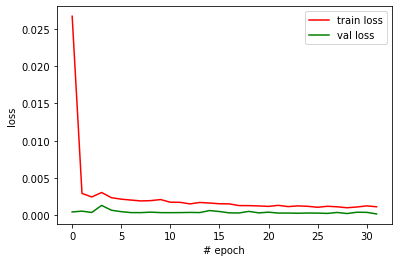

In [65]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [66]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

r2 score: 0.9654690204433551


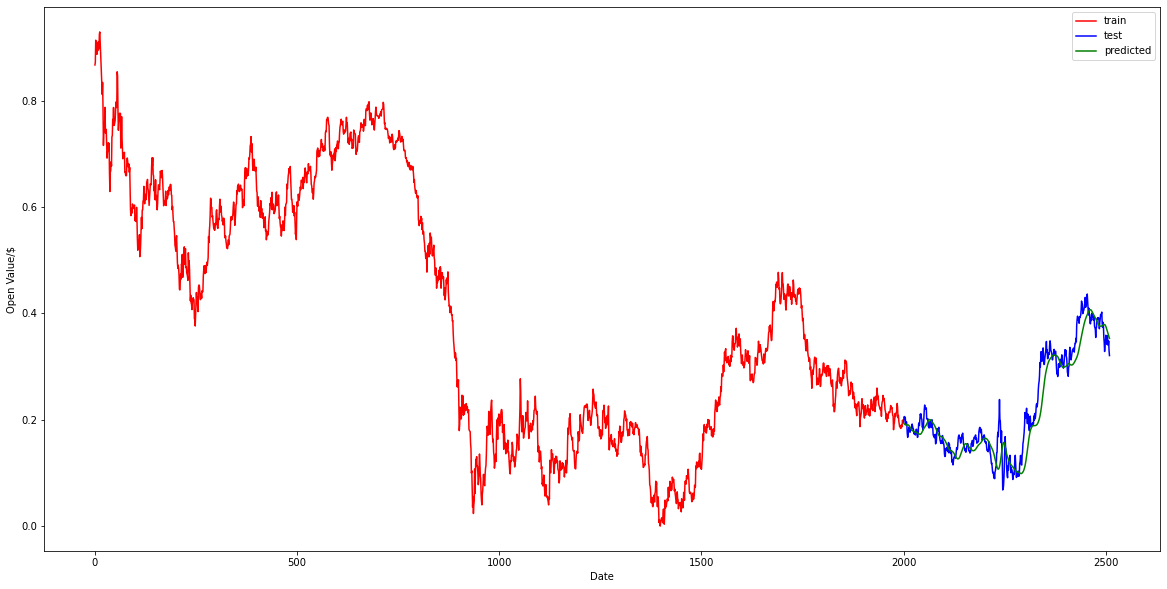

In [37]:
test_x_range=np.arange(2000,2510,1)
#test_x_range is an array of values between 1000-1208
plt.figure(figsize=(20,10))
plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

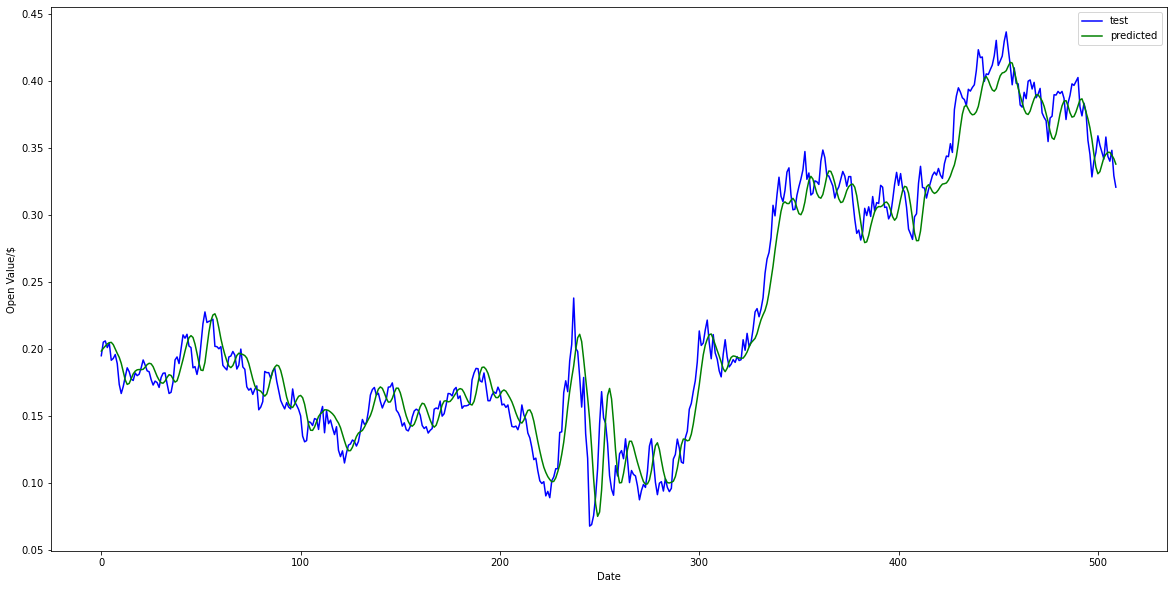

In [67]:
plt.figure(figsize=(20,10))
plt.plot(test_target,'b',label='test')
plt.plot(result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

In [68]:
today_data=data[-10:]

print(today_data.shape)

(10, 100, 1)


In [69]:
result_new=model.predict(today_data)
last10=target[-10:]
cvl=scaler.inverse_transform(last10)
prd=scaler.inverse_transform(result_new)
print(prd)




[[1.1857256]
 [1.1864393]
 [1.1888005]
 [1.1910894]
 [1.1921444]
 [1.1928533]
 [1.192819 ]
 [1.191835 ]
 [1.190735 ]
 [1.1889402]]


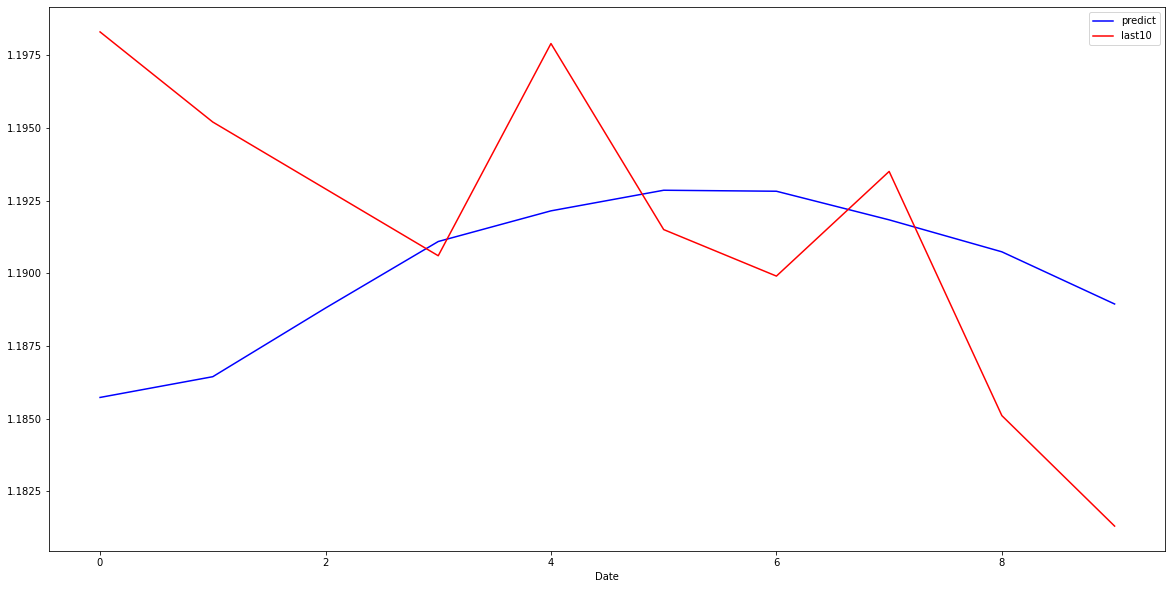

In [70]:
plt.figure(figsize=(20,10))
plt.plot(prd,'b',label='predict')
plt.plot(cvl,'r',label='last10')
plt.xlabel('Date')
plt.legend()
plt.show()

In [71]:
import pandas as pd

new_dataset=pd.read_csv('EUR_USD Historical Data.csv').values
new_open_value=new_dataset[:,2]
print(new_open_value[:5])

new_open_value=new_open_value.reshape(-1,1) #convering into a column vector
print(new_open_value[:5])

print(new_open_value.shape)

[1.4171 1.4046 1.4081 1.4112 1.4129]
[[1.4171]
 [1.4046]
 [1.4081]
 [1.4112]
 [1.4129]]
(2610, 1)


In [72]:
last_h=new_open_value[-100:]



In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_last_h=scaler.fit_transform(last_h)

print(last_h[:5])
print(scaled_last_h[:5])

[[1.1826]
 [1.1882]
 [1.1812]
 [1.181]
 [1.1777]]
[[0.08909091]
 [0.19090909]
 [0.06363636]
 [0.06      ]
 [0.        ]]


In [74]:
import numpy as np
target_h=[]
target_h.append(scaled_last_h)
final_data=np.array(target_h)
print(final_data.shape)

(1, 100, 1)


In [75]:
tommorow=model.predict(final_data)

In [76]:
ti=scaler.inverse_transform(tommorow)
print(last_h[0])
print('today',last_h[-1])
print('Tommorow',ti)

[1.1826]
today [1.1813]
Tommorow [[1.1895313]]
